## Maskbits QA in dr8c

In [138]:
import os, time
import numpy as np
import fitsio
from glob import glob
import matplotlib.pyplot as plt
from astropy.table import vstack, Table, hstack

### Check the masking

In [130]:
MASKBITS = dict(
    NPRIMARY   = 0x1,   # not PRIMARY
    BRIGHT     = 0x2,
    SATUR_G    = 0x4,
    SATUR_R    = 0x8,
    SATUR_Z    = 0x10,
    ALLMASK_G  = 0x20,
    ALLMASK_R  = 0x40,
    ALLMASK_Z  = 0x80,
    WISEM1     = 0x100, # WISE masked
    WISEM2     = 0x200,
    BAILOUT    = 0x400, # bailed out of processing
    MEDIUM     = 0x800, # medium-bright star
    GALAXY     = 0x1000, # LSLGA large galaxy
    CLUSTER    = 0x2000, # Cluster catalog source
)

# Bits in the "brightblob" bitmask
IN_BLOB = dict(
    BRIGHT = 0x1,
    MEDIUM = 0x2,
    CLUSTER = 0x4,
    GALAXY = 0x8,
)

In [1]:
def gather_gaia(camera='decam'):
    #dr8dir = '/global/project/projectdirs/cosmo/work/legacysurvey/dr8b'
    dr8dir = '/Users/ioannis/work/legacysurvey/dr8c'
    #outdir = os.getenv('HOME')
    outdir = dr8dir

    for cam in np.atleast_1d(camera):
        outfile = os.path.join(outdir, 'check-gaia-{}.fits'.format(cam))
        if os.path.isfile(outfile):
            gaia = Table.read(outfile)
        else:
            out = []
            catfile = glob(os.path.join(dr8dir, cam, 'tractor', '???', 'tractor*.fits'))
            for ii, ff in enumerate(catfile[1:]):
                if ii % 100 == 0:
                    print('{} / {}'.format(ii, len(catfile)))
                cc = Table(fitsio.read(ff, upper=True, columns=['BRICK_PRIMARY', 'BRICKNAME', 'BX', 'BY',
                                                                'REF_CAT', 'REF_ID', 'RA', 'DEC', 'TYPE',
                                                                'FLUX_G', 'FLUX_R', 'FLUX_Z',
                                                                'FLUX_IVAR_G', 'FLUX_IVAR_R', 'FLUX_IVAR_Z',
                                                                'BRIGHTBLOB', 'MASKBITS', 'GAIA_PHOT_G_MEAN_MAG']))
                cc = cc[cc['BRICK_PRIMARY']]
                out.append(cc)
            out = vstack(out)
            out.write(outfile, overwrite=True)
        return gaia

In [146]:
%time gaia = gather_gaia(camera='decam')

<Table length=1511710>
BRICKNAME BRICK_PRIMARY BRIGHTBLOB ... FLUX_IVAR_G FLUX_IVAR_R FLUX_IVAR_Z
  bytes8       bool       int16    ...   float32     float32     float32  
--------- ------------- ---------- ... ----------- ----------- -----------
 1350p335          True          0 ...    1476.666   474.39328    94.09064
 1350p335          True          0 ...   1488.9829    474.3993   94.199844
 1350p335          True          0 ...   142.83481   56.931503    34.93273
 1350p335          True          2 ...   31.101421     16.9854    8.076427
 1350p335          True          2 ...   385.91187   127.05324   55.148693
 1350p335          True          0 ...   332.55164    80.33479   28.643694
 1350p335          True          0 ...     1512.96    474.5875    66.08998
 1350p335          True          0 ...    561.4854   130.46448   46.514046
 1350p335          True          0 ...   1303.8052   403.57907   76.660934
 1350p335          True          0 ...   1202.6208   382.69427    74.90841
      ...           ...        ... ...         ...         ...         ...
 1402p317          True          0 ...    320.7422   387.40826    49.80584
 1402p317          True          0 ...    397.8411   378.61432   49.497894
 1402p317          True          0 ...   458.56357   402.69006    96.53552
 1402p317          True          0 ...   438.70844   645.66943    96.82136
 1402p317          True          0 ...   444.53488    649.4835   97.175934
 1402p317          True          0 ...   438.79602    641.9038    96.25585
 1402p317          True          0 ...   288.79156   335.34418    35.55767
 1402p317          True          0 ...    461.2271    635.0946     97.7847
 1402p317          True          0 ...   462.27548   633.20154   97.820885
 1402p317          True          0 ...   215.81064   234.56882   28.635487

#### All DUPs should be in an LSLGA blob.

In [132]:
idup = gaia['TYPE'] == 'DUP'
assert(np.all(gaia[idup]['MASKBITS'] & MASKBITS['GALAXY'] != 0))
assert(np.all(gaia[idup]['FLUX_G'] == 0))
for band in ('G', 'R', 'Z'):
    assert(np.all(gaia[idup]['FLUX_{}'.format(band)] == 0))
    assert(np.all(gaia[idup]['FLUX_IVAR_{}'.format(band)] == 0))
gaia[idup]

<Table length=224>
BRICKNAME BRICK_PRIMARY BRIGHTBLOB ... FLUX_IVAR_G FLUX_IVAR_R FLUX_IVAR_Z
  bytes8       bool       int16    ...   float32     float32     float32  
--------- ------------- ---------- ... ----------- ----------- -----------
                   True          0 ...         0.0         0.0         0.0
                   True          0 ...         0.0         0.0         0.0
                   True          0 ...         0.0         0.0         0.0
                   True          0 ...         0.0         0.0         0.0
                   True          0 ...         0.0         0.0         0.0
                   True          0 ...         0.0         0.0         0.0
                   True          0 ...         0.0         0.0         0.0
                   True          0 ...         0.0         0.0         0.0
                   True          0 ...         0.0         0.0         0.0
                   True          0 ...         0.0         0.0         0.0
      ...           ...        ... ...         ...         ...         ...
                   True          0 ...         0.0         0.0         0.0
                   True          0 ...         0.0         0.0         0.0
                   True          0 ...         0.0         0.0         0.0
                   True          0 ...         0.0         0.0         0.0
                   True          0 ...         0.0         0.0         0.0
                   True          0 ...         0.0         0.0         0.0
                   True          0 ...         0.0         0.0         0.0
                   True          0 ...         0.0         0.0         0.0
                   True          0 ...         0.0         0.0         0.0
                   True          0 ...         0.0         0.0         0.0

#### 1) Find all bright Gaia stars.
#### 2) Make sure the magnitude limits are correct.
#### 3) Make sure the masking behavior around them is correct.

1606 2364
2360
NPRIMARY 0
BRIGHT 4
SATUR_G 0
SATUR_R 0
SATUR_Z 0
ALLMASK_G 0
ALLMASK_R 0
ALLMASK_Z 0
WISEM1 1
WISEM2 1
BAILOUT 0
MEDIUM 4
GALAXY 0
CLUSTER 0


<Table length=4>
BRICKNAME BRICK_PRIMARY BRIGHTBLOB ...       REF_ID       GAIA_PHOT_G_MEAN_MAG
  bytes8       bool       int16    ...       int64              float32       
--------- ------------- ---------- ... ------------------ --------------------
 1324p337          True          0 ... 716188888984974080            18.107346
 1337p330          True          0 ... 713119293037908736            19.135618
 1373p330          True          0 ... 712378668877879296            19.322224
 1400p342          True          0 ... 702340303811110656            21.172768

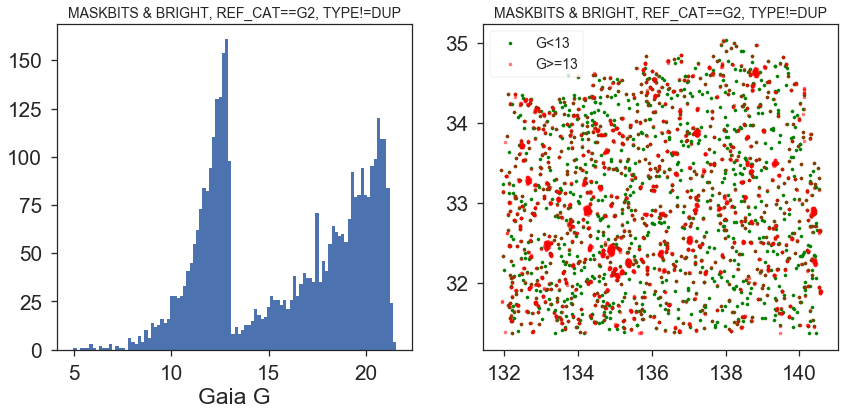

In [126]:
ibright = np.where(((gaia['MASKBITS'] & MASKBITS['BRIGHT']) != 0) * (gaia['REF_CAT'] == 'G2') * (gaia['TYPE'] != 'DUP'))[0]
#bb = (gaia['BRIGHTBLOB'][ibright] & IN_BLOB['BRIGHT'] != 0) == False
#gaia[ibright][bb]
#gaia[ibright]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
_ = ax1.hist(gaia[ibright]['GAIA_PHOT_G_MEAN_MAG'], bins=100)
ax1.set_xlabel('Gaia G')
ax1.set_title('MASKBITS & BRIGHT, REF_CAT==G2, TYPE!=DUP', fontsize=14)

isb = np.where(gaia[ibright]['GAIA_PHOT_G_MEAN_MAG'] < 13.0)[0]
isf = np.where(gaia[ibright]['GAIA_PHOT_G_MEAN_MAG'] >= 13.0)[0]
print(len(isb), len(isf))

ax2.scatter(gaia['RA'][ibright][isb], gaia['DEC'][ibright][isb], s=10, color='green', label='G<13')
ax2.scatter(gaia['RA'][ibright][isf], gaia['DEC'][ibright][isf], s=10, color='red', alpha=0.5, label='G>=13')
ax2.legend(fontsize=14, frameon=True)
ax2.set_title('MASKBITS & BRIGHT, REF_CAT==G2, TYPE!=DUP', fontsize=14)

#ax.set_xlim(136.8, 137.2)
#ax.set_ylim(32.4, 32.8)

print(np.sum(gaia['BRIGHTBLOB'][ibright][isf] & IN_BLOB['BRIGHT'] != 0))
check = np.where(gaia['BRIGHTBLOB'][ibright][isf] & IN_BLOB['BRIGHT'] == 0)[0] # no bright targeting bit set

for key in MASKBITS.keys():
    print(key, np.sum(gaia['MASKBITS'][ibright][isf][check] & MASKBITS[key] != 0))

gaia[ibright][isf][check]

#### Make sure the MASKBITS values are set correctly.

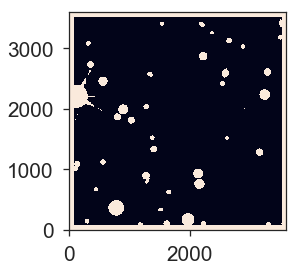

In [156]:
mask = fitsio.read('decam/coadd/132/1325p325/legacysurvey-1325p325-maskbits.fits.fz')
#print(mask.max())
c = plt.imshow(mask > 0, origin='lower')
#plt.colorbar(c)

In [152]:
ww = gaia['BRICKNAME'] == '1325p325'
eq = []
for obj in gaia[ww]:
    eq.append(mask[int(obj['BY']), int(obj['BX'])] == obj['MASKBITS'])
assert(np.all(eq))